# Segmentation

This notebook presents some segmentation techniques explained in the "Introduction to Image Processing.pdf" file.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

Defining the image that will be used.

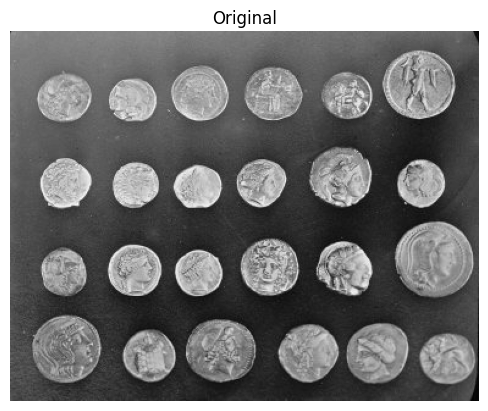

In [5]:
coins = sk.data.coins()

plt.imshow(coins, 'gray')
plt.title('Original')
plt.axis('off')
plt.show()

## Threshold

### Otsu

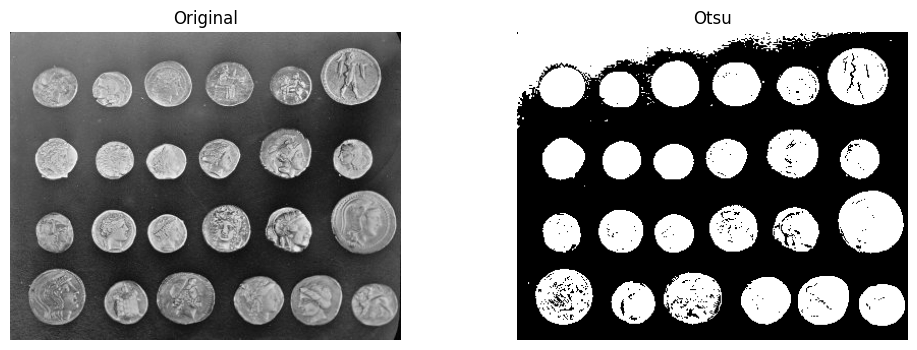

In [7]:
otsu = sk.filters.threshold_otsu(coins) 
otsu_thr = coins > otsu

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(coins, 'gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(otsu_thr, 'gray')
ax[1].set_title('Otsu')
ax[1].axis('off')

plt.show()

### Sauvola

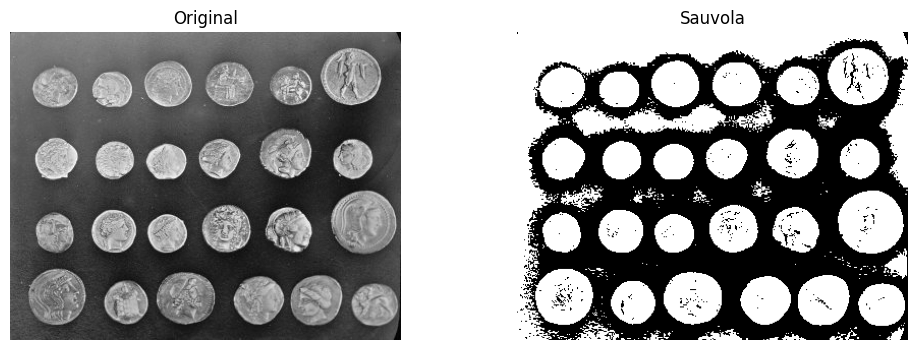

In [14]:
sauvola = sk.filters.threshold_sauvola(coins, window_size=45) 
sauvola_thr = coins > sauvola

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(coins, 'gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(sauvola_thr, 'gray')
ax[1].set_title('Sauvola')
ax[1].axis('off')

plt.show()

## Watershed

This is a possible pipeline for using segmentation via watershed in this particular case. Note that this is only a example, so the result isn't the most important thing.

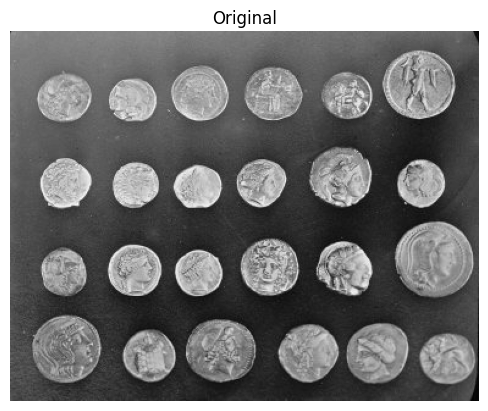

In [15]:
coins = sk.data.coins()

plt.imshow(coins, 'gray')
plt.title('Original')
plt.axis('off')
plt.show()

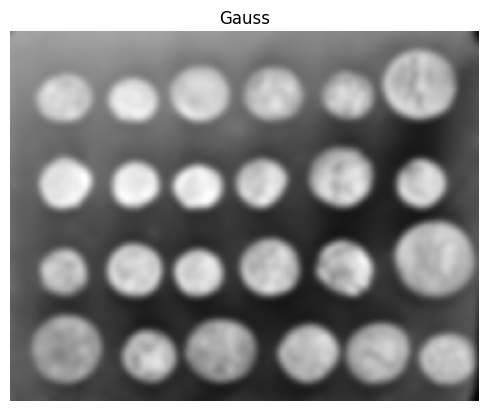

In [16]:
gauss = sk.filters.gaussian(coins, sigma=3)

plt.imshow(gauss, 'gray')
plt.title('Gauss')
plt.axis('off')
plt.show()

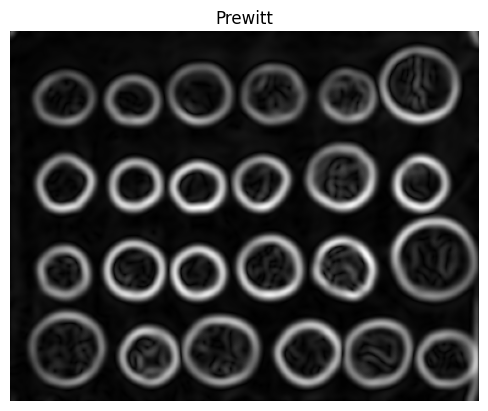

In [23]:
prewitt = sk.filters.prewitt(gauss)

plt.imshow(prewitt, 'gray')
plt.title('Prewitt')
plt.axis('off')
plt.show()

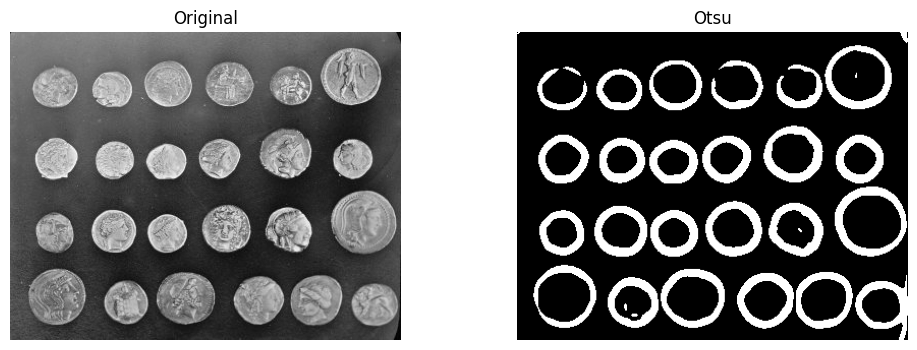

In [25]:
otsu = sk.filters.threshold_otsu(prewitt) 
otsu_thr = prewitt > otsu

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(coins, 'gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(otsu_thr, 'gray')
ax[1].set_title('Otsu')
ax[1].axis('off')

plt.show()

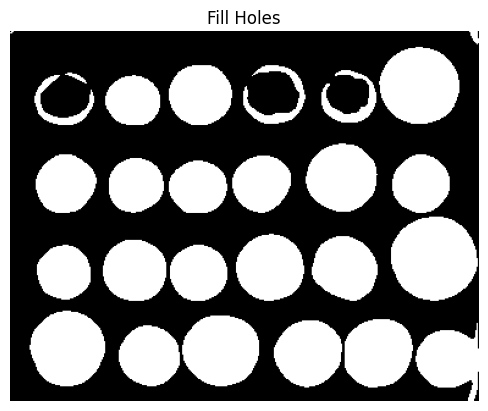

In [30]:
fill = ndi.binary_fill_holes(otsu_thr)

plt.imshow(fill, 'gray')
plt.title('Fill Holes')
plt.axis('off')
plt.show()

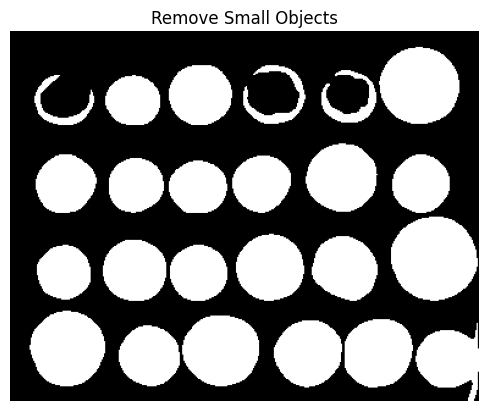

In [32]:
remove = sk.morphology.remove_small_objects(fill)

plt.imshow(remove, 'gray')
plt.title('Remove Small Objects')
plt.axis('off')
plt.show()

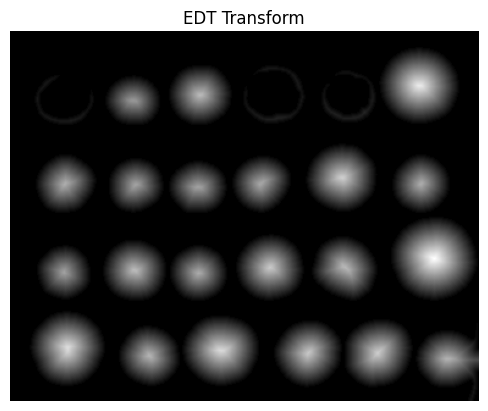

In [33]:
dist = ndi.distance_transform_edt(remove)

plt.imshow(dist, 'gray')
plt.title('EDT Transform')
plt.axis('off')
plt.show()

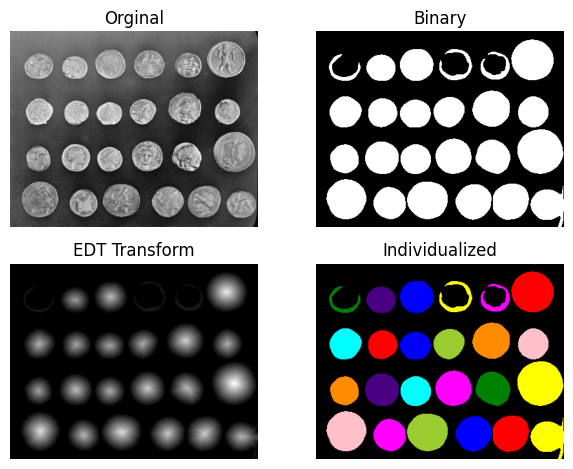

In [36]:
coords = peak_local_max(dist, footprint=np.ones((3, 3)), labels=remove)
mask1 = np.zeros(dist.shape, dtype=bool)
mask1[tuple(coords.T)] = True
markers, _ = ndi.label(remove)
labels = watershed(-dist, markers, mask=remove)
intensidade = remove * coins

fig, axes = plt.subplots(2,2 ,  sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(coins, 'gray')
ax[0].set_title('Orginal')
ax[1].imshow(remove, 'gray')
ax[1].set_title('Binary')
ax[2].imshow(dist, 'gray')
ax[2].set_title('EDT Transform')
ax[3].imshow(sk.color.label2rgb(labels))
ax[3].set_title('Individualized')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()